In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

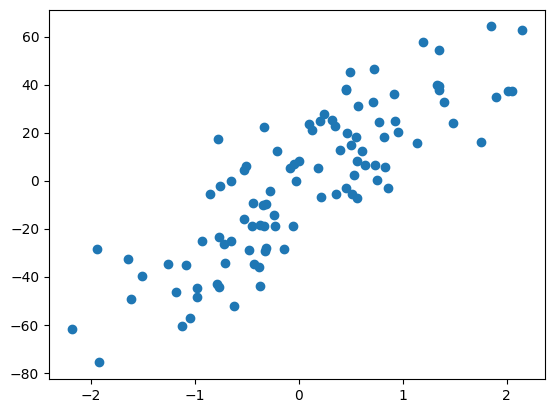

In [4]:
plt.scatter(X,y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [18]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred))

print('Coefficient: ', lr.coef_)
print('Intercept: ', lr.intercept_)

R2 score:  0.6345158782661012
Coefficient:  [28.12597332]
Intercept:  -2.2710144261783825


In [19]:
from sklearn.linear_model import Ridge

In [52]:
rr= Ridge(alpha=10)
rr.fit(X_train,y_train)

y_pred_rr = rr.predict(X_test)

print('r2 score: ', r2_score(y_test, y_pred_rr))
print('Coef: ', rr.coef_)
print('Intercept: ', rr.intercept_)
print(y_pred[0])

r2 score:  0.6387892505532382
Coef:  [24.84312743]
Intercept:  -2.1047489001173156
21.099015932559848


In [48]:
rr1 = Ridge(alpha=100)
rr1.fit(X_train,y_train)

y_pred_2 = rr1.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred_2))
print('Coef: ', rr1.coef_)
print('Intercept: ', rr1.intercept_)

print(y_pred_2[0])

R2 score:  0.45924722403586427
Coef:  [12.11579539]
Intercept:  -1.4601506973989027
8.60693224155995


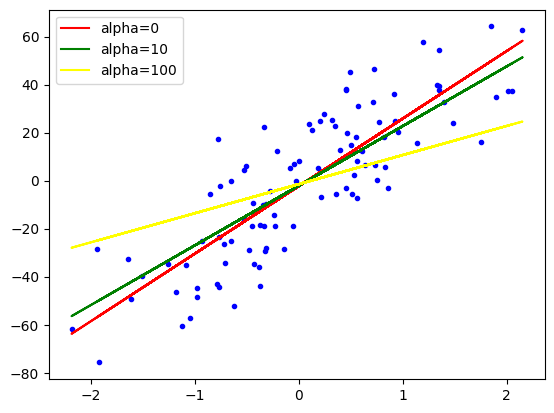

In [40]:
plt.plot(X,y, 'b.')
plt.plot(X, lr.predict(X), color='red', label='alpha=0')
plt.plot(X, rr.predict(X), color='green', label='alpha=10')
plt.plot(X, rr1.predict(X), color='yellow', label='alpha=100')
plt.legend()
plt.show()

# Ridge regression from Scratch

In [44]:
class myRidge:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i]-X_train.mean())
            den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m, self.b)
    
    def predict(self, X_test):
        return np.dot(X_test, self.m) + self.b

In [49]:
ridge = myRidge(alpha=0)

In [50]:
ridge.fit(X_train,y_train)

[28.12597332] [-2.27101443]


In [51]:
ridge.predict(X_test)

array([ 21.09901593,  18.03495551,  18.23747414,  -8.10292651,
        15.72634513,  58.21059953, -15.03324179, -11.33105581,
       -15.81005402,  -8.8082183 , -23.57512364,  14.78144416,
        12.70150681, -23.8893975 , -22.30769518, -16.670531  ,
        24.52827391, -16.98551717,  -3.88916883, -12.01966768])